In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report,confusion_matrix

In [52]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [53]:
df = pd.read_csv("Score.csv")
df.head()

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_Mix,...,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month
0,3.000,7.000,4.000,26.823,265.000,No,80.415,312.494,Good,Good,...,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575
1,3.000,7.000,4.000,31.945,265.000,No,118.280,284.629,Good,Good,...,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575
2,3.000,7.000,4.000,28.609,267.000,No,81.700,331.210,Good,Good,...,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575
3,5.000,4.000,4.000,31.378,268.000,No,199.458,223.451,Good,Good,...,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575
4,6.000,4.000,4.000,24.797,269.000,No,41.420,341.489,Good,Good,...,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99960 entries, 0 to 99959
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Delay_from_due_date       99960 non-null  float64
 1   Num_of_Delayed_Payment    99960 non-null  float64
 2   Num_Credit_Inquiries      99960 non-null  float64
 3   Credit_Utilization_Ratio  99960 non-null  float64
 4   Credit_History_Age        99960 non-null  float64
 5   Payment_of_Min_Amount     99960 non-null  object 
 6   Amount_invested_monthly   99960 non-null  float64
 7   Monthly_Balance           99960 non-null  float64
 8   Credit_Score              99960 non-null  object 
 9   Credit_Mix                99960 non-null  object 
 10  Payment_Behaviour         99960 non-null  object 
 11  Age                       99960 non-null  float64
 12  Annual_Income             99960 non-null  float64
 13  Num_Bank_Accounts         99960 non-null  float64
 14  Num_Cr

In [55]:
df.columns

Index(['Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Amount_invested_monthly', 'Monthly_Balance',
       'Credit_Score', 'Credit_Mix', 'Payment_Behaviour', 'Age',
       'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Monthly_Inhand_Salary',
       'Changed_Credit_Limit', 'Outstanding_Debt', 'Total_EMI_per_month'],
      dtype='object')

In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Delay_from_due_date,99960.000,21.096,14.827,0.000,10.000,18.000,28.000,67.000
Num_of_Delayed_Payment,99960.000,13.336,6.270,0.000,9.000,14.000,18.000,28.000
Num_Credit_Inquiries,99960.000,5.775,3.862,0.000,3.000,5.000,8.000,29.000
Credit_Utilization_Ratio,99960.000,32.285,5.117,20.000,28.052,32.305,36.496,50.000
Credit_History_Age,99960.000,221.123,99.696,1.000,144.000,219.000,302.000,404.000
Amount_invested_monthly,99960.000,193.665,194.783,0.000,73.709,129.342,234.324,1977.326
Monthly_Balance,99960.000,403.445,214.387,0.008,270.317,337.238,471.905,1602.041
Age,99960.000,33.269,10.762,14.000,24.000,33.000,42.000,56.000
Annual_Income,99960.000,50498.704,38294.243,7005.930,19338.480,36996.830,71681.400,179987.280
Num_Bank_Accounts,99960.000,5.369,2.592,0.000,3.000,5.000,7.000,10.000


In [57]:
df.shape

(99960, 21)

In [58]:
df.isnull().sum().any()

False

In [59]:
df.duplicated().sum()

0

Asagidaki kodda
Sütun Adı ve Veri Türü:

print(f"Details of {column} column\nDataType: {df[column].dtype}"): Fonksiyon, belirli bir sütunun adını ve veri türünü ekrana yazdırır. Bu kısım, sütunun hangi özelliklere sahip olduğunu gösterir.

Null Değerler:

count_null = df[column].isnull().sum(): Belirli bir sütundaki null değerlerin sayısını hesaplar.
print(f"\nNull values: {count_null}" if count_null > 0 else "\nNo null values"): Eğer sütunda null değer varsa, bu değerleri ekrana yazdırır; aksi takdirde "No null values" yazar. Null değerlerin olup olmaması veri setinin temizliği hakkında bilgi sağlar.

Benzersiz Değerlerin Sayısı ve Dağılımı:

print(f"\nNumber of Unique Values: {df[column].nunique()}\nDistribution of column:\n"): Sütundaki benzersiz değerlerin sayısını ve dağılımını ekrana yazdırır. Bu, sütundaki çeşitliliği ve değerlerin ne kadar yaygın olduğunu gösterir.

Benzersiz Değerlerin Dağılımı:

if top_n_unique_values is not None:: Eğer top_n_unique_values argümanı belirtilmişse:
print(df[column].value_counts().head(top_n_unique_values)): Sütundaki benzersiz değerlerin sayısını ve en yaygın olanları yazdırır.

Aksi takdirde:
print(df[column].value_counts()): Tüm benzersiz değerlerin sayısını ve dağılımını yazdırır.

In [60]:
def get_column_details(df, column, top_n_unique_values=None):
    # Print the column name and data type
    print(f"Details of {column} column\nDataType: {df[column].dtype}")

    # Check and print the number of null values
    count_null = df[column].isnull().sum()
    print(f"\nNull values: {count_null}" if count_null > 0 else "\nNo null values")

    # Print the number of unique values in the column
    print(f"\nNumber of Unique Values: {df[column].nunique()}\nDistribution of column:\n")

    # Print the distribution of unique values, considering top_n_unique_values
    if top_n_unique_values is not None:
        print(df[column].value_counts().head(top_n_unique_values))
    else:
        print(df[column].value_counts())

In [61]:
col_name = 'Credit_Score'
user_friendly_name = 'Credit Score'

In [62]:
get_column_details(df,col_name)

Details of Credit_Score column
DataType: object

No null values

Number of Unique Values: 3
Distribution of column:

Standard    53149
Poor        28988
Good        17823
Name: Credit_Score, dtype: int64


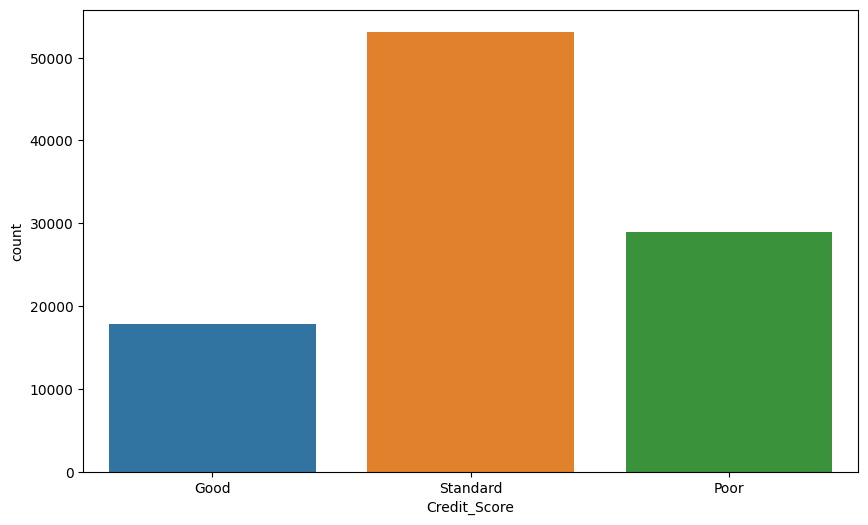

In [63]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x=col_name)
plt.show()

In [30]:
col_name = 'Monthly_Balance'
get_column_details(df,col_name)

Details of Monthly_Balance column
DataType: float64

No null values

Number of Unique Values: 98916
Distribution of column:

270.100    6
460.168    4
113.701    4
282.069    4
177.760    4
          ..
252.392    1
128.814    1
443.159    1
399.538    1
393.674    1
Name: Monthly_Balance, Length: 98916, dtype: int64


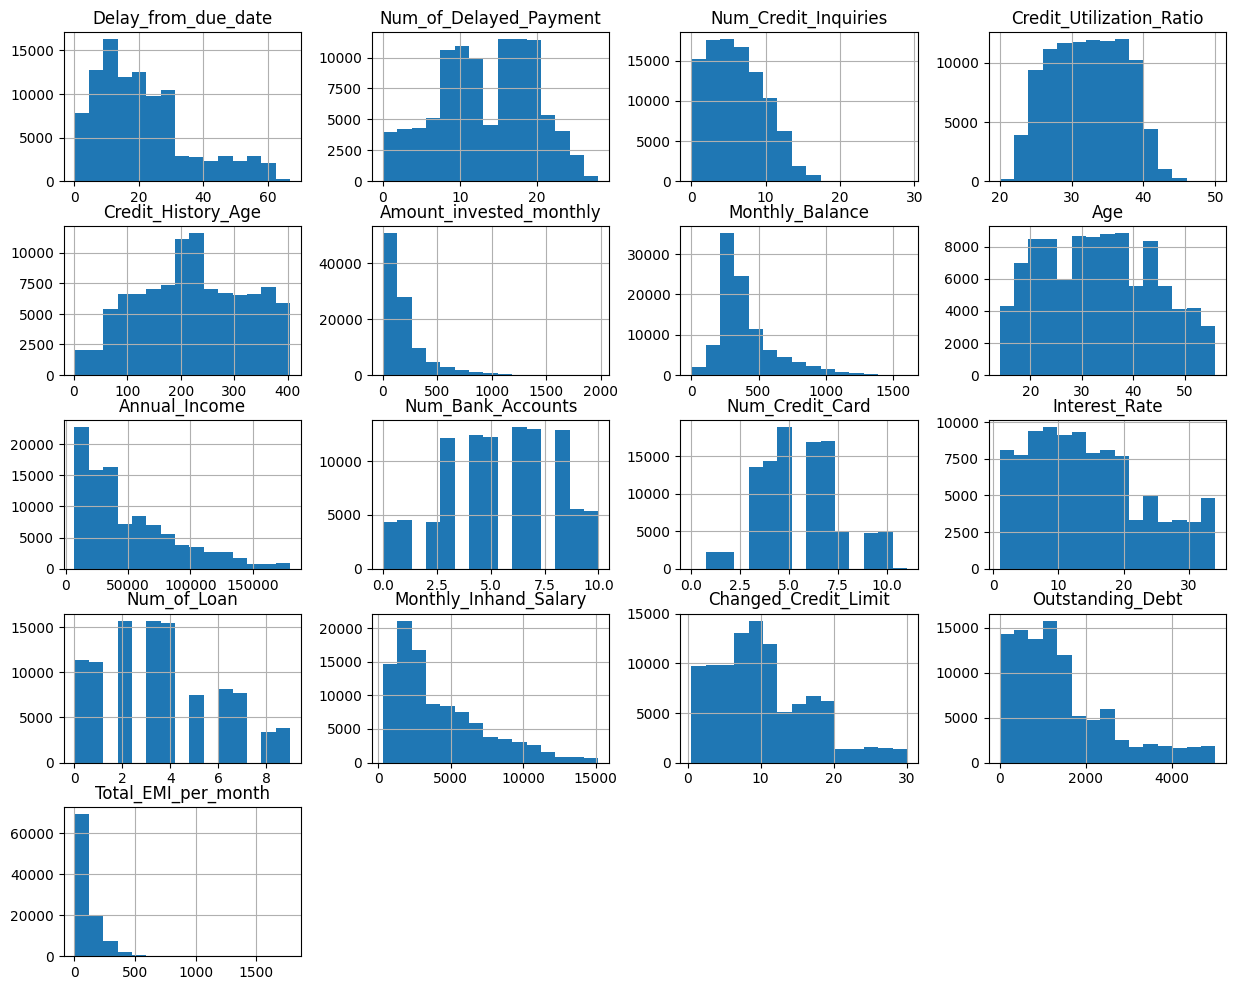

In [31]:
df.hist(figsize=(15, 12), bins=15);

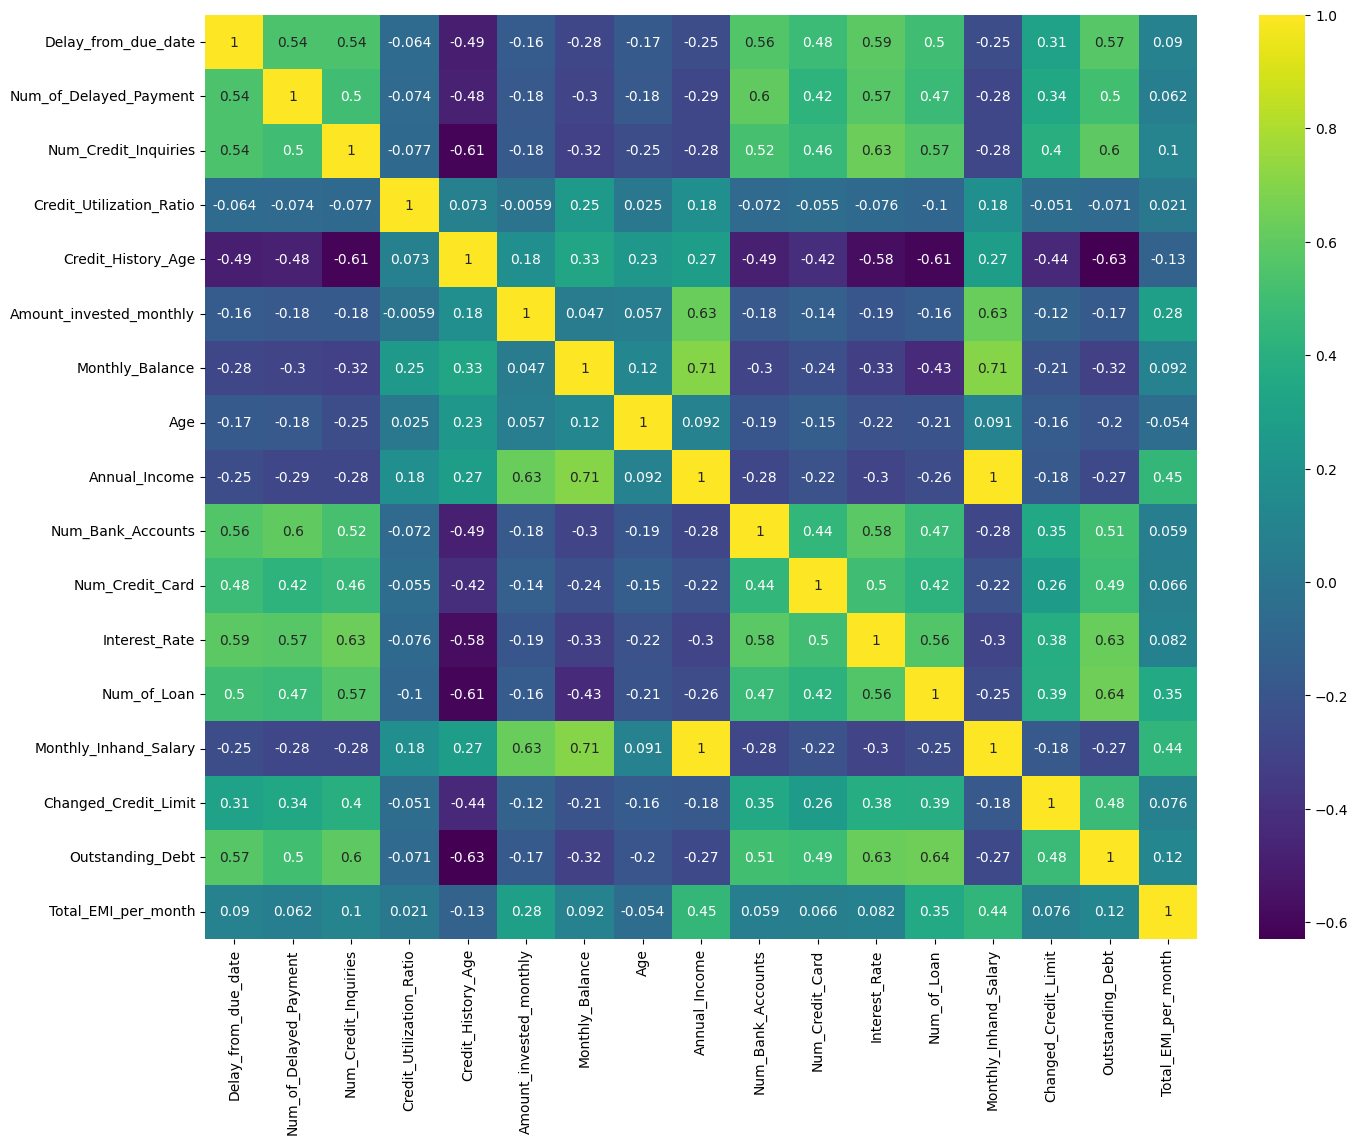

In [32]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, cmap='viridis');

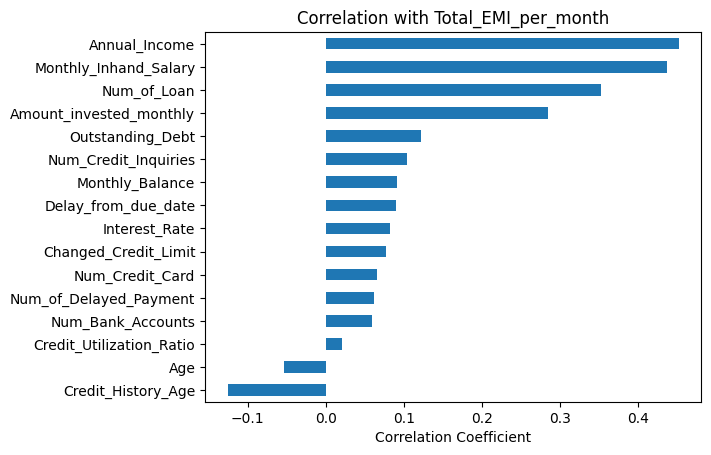

In [33]:
corr_matrix = df.corr()

# Exclude the last row, which is the correlation with 'Total_EMI_per_month'
correlations = corr_matrix.iloc[:-1, -1]

# Sort the correlations and plot as a horizontal bar chart
correlations.sort_values().plot.barh()
plt.title('Correlation with Total_EMI_per_month')
plt.xlabel('Correlation Coefficient')
plt.show()

In [34]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Amount_invested_monthly,Monthly_Balance,Age,Annual_Income,Num_Bank_Accounts,...,Payment_of_Min_Amount_Yes,Credit_Score_Poor,Credit_Score_Standard,Credit_Mix_Good,Credit_Mix_Standard,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,3.000,7.000,4.000,26.823,265.000,80.415,312.494,23.000,19114.120,3.000,...,0,0,0,1,0,1,0,0,0,0
1,3.000,7.000,4.000,31.945,265.000,118.280,284.629,23.000,19114.120,3.000,...,0,0,0,1,0,1,0,0,0,0
2,3.000,7.000,4.000,28.609,267.000,81.700,331.210,23.000,19114.120,3.000,...,0,0,0,1,0,1,0,0,0,0
3,5.000,4.000,4.000,31.378,268.000,199.458,223.451,23.000,19114.120,3.000,...,0,0,0,1,0,1,0,0,0,0
4,6.000,4.000,4.000,24.797,269.000,41.420,341.489,23.000,19114.120,3.000,...,0,0,0,1,0,1,0,0,0,0


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [36]:
def fill_missing_with_group_mode(df, groupby, column):
    """
    Fill missing values in a specified column with the mode of that column within each group.

    Parameters:
        - df: DataFrame
            The DataFrame containing the data.
        - groupby: str
            The column by which to group the data.
        - column: str
            The column with missing values to be filled.

    Returns:
        None
    """
    print("\nNo. of missing values before filling with group mode:", df[column].isnull().sum())

    # Fill with local mode
    mode_per_group = df.groupby(groupby)[column].transform(lambda x: x.mode().iat[0])
    df[column] = df[column].fillna(mode_per_group)

    print("\nNo. of missing values after filling with group mode:", df[column].isnull().sum())

In [37]:
import numpy as np

def clean_categorical_field(df, groupby, column, replace_value=None):
    """
    Clean a categorical field in a DataFrame.

    Parameters:
        - df: DataFrame
            The DataFrame containing the data.
        - groupby: str
            The column by which to group the data.
        - column: str
            The column to be cleaned.
        - replace_value: any, optional
            The value to replace with np.nan. Default is None.

    Returns:
        None
    """
    print("\n-----------------------------------------------------")
    print("\nCleaning steps")

    # Replace with np.nan
    if replace_value is not None:
        df[column] = df[column].replace(replace_value, np.nan)
        print(f"\nGarbage value {replace_value} is replaced with np.nan")

    # For each Customer_ID, assign the same value for the column
    fill_missing_with_group_mode(df, groupby, column)

In [38]:
import numpy as np
from scipy import stats

def fix_inconsistent_values(df, groupby, column):
    """
    Handle outliers and null values in a specified column of a DataFrame.

    Parameters:
        - df: DataFrame
            The DataFrame containing the data.
        - groupby: str
            The column by which to group the data.
        - column: str
            The column to be cleaned.

    Returns:
        None
    """
    print("\nExisting Min, Max Values:", df[column].apply([min, max]), sep='\n', end='\n')

    # Calculate mode within each group after dropping null values
    df_dropped = df[df[column].notna()].groupby(groupby)[column].apply(list)
    x, y = df_dropped.apply(lambda x: stats.mode(x)).apply([min, max])
    mini, maxi = x[0][0], y[0][0]

    # Assign wrong values to NaN
    col = df[column].apply(lambda x: np.NaN if ((x < mini) or (x > maxi) or (x < 0)) else x)

    # Fill with local mode
    mode_by_group = df.groupby(groupby)[column].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)
    df[column] = col.fillna(mode_by_group)


In [39]:
import numpy as np
from scipy import stats

def clean_numerical_field(df, groupby, column, strip=None, datatype=None, replace_value=None):
    """
    Clean a numerical field in a DataFrame.

    Parameters:
        - df: DataFrame
            The DataFrame containing the data.
        - groupby: str
            The column by which to group the data.
        - column: str
            The column to be cleaned.
        - strip: str or None, optional
            The character(s) to be removed from trailing and leading positions. Default is None.
        - datatype: type or None, optional
            The datatype to convert the column to. Default is None.
        - replace_value: any or None, optional
            The value to replace with np.nan. Default is None.

    Returns:
        None
    """
    print("\n-----------------------------------------------------")
    print("\nCleaning steps")

    # Replace with np.nan
    if replace_value is not None:
        df[column] = df[column].replace(replace_value, np.nan)
        print(f"\nGarbage value {replace_value} is replaced with np.nan")

    # Remove trailing & leading special characters
    if df[column].dtype == object and strip is not None:
        df[column] = df[column].str.strip(strip)
        print(f"\nTrailing & leading {strip} are removed")

    # Change datatype
    if datatype is not None:
        df[column] = df[column].astype(datatype)
        print(f"\nDatatype of {column} is changed to {datatype}")

    # Handle outliers and null values
    fix_inconsistent_values(df, groupby, column)


In [40]:
def plot_countplot(df,column,user_friendly_column_name,rotation=0):
    print("\n-----------------------------------------------------")
    print(f'\n{user_friendly_column_name} Distribution')
    palette = "deep" 
    sns.set_palette(palette)
    
    sns.countplot(data=df, x=column)

    plt.xlabel(f'{user_friendly_column_name}')
    plt.ylabel('Number of Records')
    plt.title(f'{user_friendly_column_name} Distribution')
    plt.xticks(rotation=rotation)

    plt.show()

In [41]:
def plot_displot(df,column,user_friendly_column_name,rotation=0,bins=20):
    print("\n-----------------------------------------------------")
    print(f'\n{user_friendly_column_name} Distribution')
    palette = "deep" 
    sns.set_palette(palette)
    
    sns.displot(data=df, x=column, kde=True, bins=bins)

    plt.xlabel(f'{user_friendly_column_name}')
    plt.ylabel('Number of Records')
    plt.title(f'{user_friendly_column_name} Distribution')
    plt.xticks(rotation=rotation)

    plt.show()

In [42]:
def plot_stacked_bar(df,column1,column2,rotation=0):
    print("\n-----------------------------------------------------")
    print(f'\n{column1} & {column2} Distribution')
    palette = "deep" 
    sns.set_palette(palette)

    pd.crosstab(df[column1], df[column2]).plot(kind='bar', stacked=True)
    
    plt.xlabel(f'{column1}')
    plt.ylabel('Number of Records')
    plt.title(f'{column1} & {column2} Distribution')
    plt.xticks(rotation=rotation)

    plt.show()

In [43]:
df['Credit_Mix'].unique()

KeyError: 'Credit_Mix'

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99960 entries, 0 to 99959
Data columns (total 28 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Delay_from_due_date                                 99960 non-null  float64
 1   Num_of_Delayed_Payment                              99960 non-null  float64
 2   Num_Credit_Inquiries                                99960 non-null  float64
 3   Credit_Utilization_Ratio                            99960 non-null  float64
 4   Credit_History_Age                                  99960 non-null  float64
 5   Amount_invested_monthly                             99960 non-null  float64
 6   Monthly_Balance                                     99960 non-null  float64
 7   Age                                                 99960 non-null  float64
 8   Annual_Income                                       99960 non-null  float64


In [46]:
df.isna().sum()

Delay_from_due_date                                   0
Num_of_Delayed_Payment                                0
Num_Credit_Inquiries                                  0
Credit_Utilization_Ratio                              0
Credit_History_Age                                    0
Amount_invested_monthly                               0
Monthly_Balance                                       0
Age                                                   0
Annual_Income                                         0
Num_Bank_Accounts                                     0
Num_Credit_Card                                       0
Interest_Rate                                         0
Num_of_Loan                                           0
Monthly_Inhand_Salary                                 0
Changed_Credit_Limit                                  0
Outstanding_Debt                                      0
Total_EMI_per_month                                   0
Payment_of_Min_Amount_No                        

In [45]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Payment_of_Min_Amount_Yes','Payment_Behaviour_Low_spent_Large_value_payments','Credit_Score_Poor']
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Loop through each column and apply label encoding
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [44]:
#Spli Input & Output Data
X = df.drop('Credit_Score_Poor',axis=1)
y = df['Credit_Score_Poor']
print(X.shape)
print(y.shape)

(99960, 27)
(99960,)


In [69]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17,stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(79968, 27)
(19992, 27)
(79968,)
(19992,)


In [71]:
def eval_metric(y_test,y_pred):
    print("Classification Report")
    print(classification_report(y_test, y_pred))
    
    print("\n---------------------------------------------\n")
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Create a heatmap of the confusion matrix using Seaborn
    sns.heatmap(cm, annot=True, cmap='Greens',fmt='.0f')

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

In [72]:
classifiers = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('Gaussion NB',GaussianNB()),
    ('XGB',xgb.XGBClassifier())
]

# Iterate over each classifier and evaluate performance
for clf_name, clf in classifiers:
    # Perform cross-validation
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    
    # Calculate average performance metrics
    avg_accuracy = scores.mean()
    avg_precision = cross_val_score(clf, X_train, y_train, cv=5, scoring='precision_macro').mean()
    avg_recall = cross_val_score(clf, X_train, y_train, cv=5, scoring='recall_macro').mean()
    
    # Print the performance metrics
    print(f'Classifier: {clf_name}')
    print(f'Average Accuracy: {avg_accuracy:.4f}')
    print(f'Average Precision: {avg_precision:.4f}')
    print(f'Average Recall: {avg_recall:.4f}')
    print('-----------------------')

Classifier: Decision Tree
Average Accuracy: 0.9753
Average Precision: 0.9699
Average Recall: 0.9701
-----------------------
Classifier: Random Forest
Average Accuracy: 0.9853
Average Precision: 0.9843
Average Recall: 0.9803
-----------------------
Classifier: KNN
Average Accuracy: 0.9565
Average Precision: 0.9491
Average Recall: 0.9448
-----------------------
Classifier: Gaussion NB
Average Accuracy: 0.8750
Average Precision: 0.8437
Average Recall: 0.8895
-----------------------
Classifier: XGB
Average Accuracy: 0.9763
Average Precision: 0.9741
Average Recall: 0.9680
-----------------------


In [73]:
# Create and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14194
           1       0.98      0.98      0.98      5798

    accuracy                           0.99     19992
   macro avg       0.99      0.99      0.99     19992
weighted avg       0.99      0.99      0.99     19992



Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     14195
           1       0.99      1.00      0.99     14194

    accuracy                           0.99     28389
   macro avg       0.99      0.99      0.99     28389
weighted avg       0.99      0.99      0.99     28389


---------------------------------------------



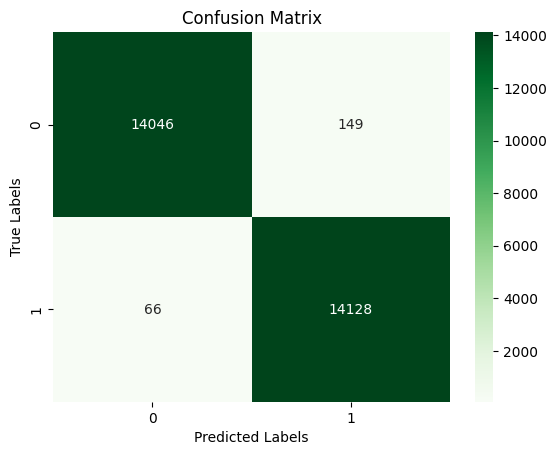

In [63]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)
eval_metric(y_test, y_pred)

### SMOTE Area
SMOTE (Synthetic Minority Over-sampling Technique), özellikle dengesiz sınıflı sınıflandırma problemleriyle başa çıkmak için kullanılan bir örnekleme tekniğidir. Genellikle, bir sınıftaki örnek sayısının diğer sınıflara göre çok daha az olduğu durumlarda kullanılır.

Dengesiz sınıflı problemler, örneğin, bir sınıfın diğerinden çok daha fazla örnek içerdiği durumlardır. Bu durum, modelin eğitilmesini zorlaştırabilir, çünkü model, daha büyük sınıftaki örnekleri öğrenirken diğer sınıftaki daha az sayıdaki örnekleri göz ardı edebilir.

SMOTE, özellikle az sayıda örneğe sahip olan sınıfları artırmak için sentetik örnekler oluşturan bir yöntemdir. Bu yöntem, bu sınıfa ait örnekler arasındaki benzerliklere dayanarak yeni sentetik örnekler üretir.

SMOTE'un temel amacı, örneğin, tıbbi teşhisler, hırsızlık tespiti veya hastalık tahmini gibi alanlarda nadir görülen olayları daha etkili bir şekilde öğrenmek için kullanılabilecek modellerin geliştirilmesine yardımcı olmaktır. Bu teknik, sınıflar arasındaki dengesizliği azaltarak model performansını artırabilir.

In [59]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

0    70972
1    70972
Name: Credit_Score_Poor, dtype: int64

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(113555, 27)
(28389, 27)
(113555,)
(28389,)


Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     14195
           1       0.99      1.00      0.99     14194

    accuracy                           0.99     28389
   macro avg       0.99      0.99      0.99     28389
weighted avg       0.99      0.99      0.99     28389


---------------------------------------------



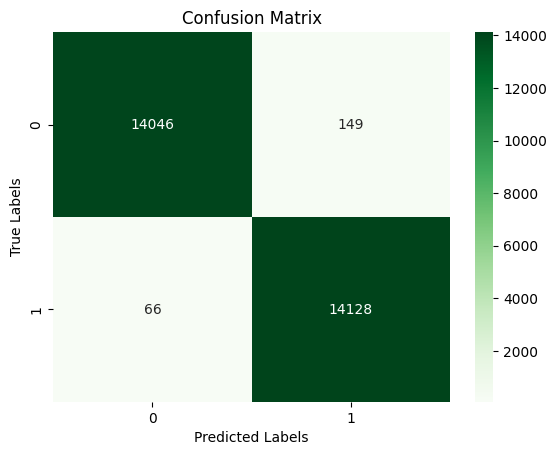

In [61]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)
eval_metric(y_test, y_pred)

## Modelling & Model Performance

In [27]:
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

In [26]:
X_train.shape

(79968, 27)

In [29]:
seed = 42  # You can use any integer value as the seed
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(32, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(16, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.002)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [30]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=90)

In [31]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=32,
          epochs=100,
          verbose=1,
          callbacks=[early_stop])

Epoch 1/100



2250/2250 [==============================] - 5s 2ms/step - loss: 0.2030 - recall: 0.8154 - val_loss: 0.1558 - val_recall: 0.8219
Epoch 2/100
2250/2250 [==============================] - 3s 1ms/step - loss: 0.1575 - recall: 0.8343 - val_loss: 0.1475 - val_recall: 0.8409
Epoch 3/100
2250/2250 [==============================] - 3s 1ms/step - loss: 0.1490 - recall: 0.8431 - val_loss: 0.1417 - val_recall: 0.8413
Epoch 4/100
2250/2250 [==============================] - 3s 1ms/step - loss: 0.1445 - recall: 0.8483 - val_loss: 0.1458 - val_recall: 0.8361
Epoch 5/100
2250/2250 [==============================] - 3s 1ms/step - loss: 0.1432 - recall: 0.8473 - val_loss: 0.1373 - val_recall: 0.8534
Epoch 6/100
2250/2250 [==============================] - 4s 2ms/step - loss: 0.1405 - recall: 0.8487 - val_loss: 0.1360 - val_recall: 0.8673
Epoch 7/100
2250/2250 [==============================] - 3s 1ms/step - loss: 0.1383 - recall: 0.8518 - val_loss: 0.1379 - val_recall: 0.8660
Epoch 8/100
2250/2250 [==

Epoch 59/100
2250/2250 [==============================] - 3s 1ms/step - loss: 0.1025 - recall: 0.9046 - val_loss: 0.1277 - val_recall: 0.9252
Epoch 60/100
2250/2250 [==============================] - 3s 1ms/step - loss: 0.1033 - recall: 0.9044 - val_loss: 0.1217 - val_recall: 0.8837
Epoch 61/100
2250/2250 [==============================] - 3s 1ms/step - loss: 0.1022 - recall: 0.9052 - val_loss: 0.1184 - val_recall: 0.9001
Epoch 62/100
2250/2250 [==============================] - 3s 1ms/step - loss: 0.1029 - recall: 0.9067 - val_loss: 0.1167 - val_recall: 0.9070
Epoch 63/100
2250/2250 [==============================] - 3s 1ms/step - loss: 0.1017 - recall: 0.9042 - val_loss: 0.1167 - val_recall: 0.8759
Epoch 64/100
2250/2250 [==============================] - 3s 1ms/step - loss: 0.1018 - recall: 0.9060 - val_loss: 0.1239 - val_recall: 0.9235
Epoch 65/100
2250/2250 [==============================] - 3s 1ms/step - loss: 0.0990 - recall: 0.9111 - val_loss: 0.1207 - val_recall: 0.8975
Epoch 

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1792      
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_2 (Bat  (None, 16)                6

In [33]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.202953,0.815395,0.155815,0.821876
1,0.157495,0.834315,0.147454,0.840899
2,0.148963,0.843081,0.141688,0.841332
3,0.144508,0.848302,0.145774,0.836144
4,0.143155,0.847344,0.137306,0.853437


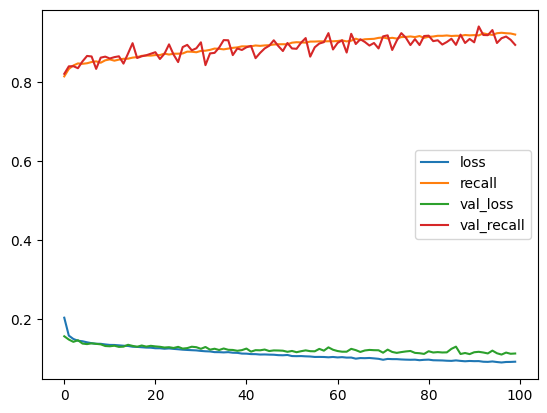

In [35]:
loss_df.plot();

In [36]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


625/625 [==============================] - 1s 729us/step
[[13900   294]
 [  597  5201]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14194
           1       0.95      0.90      0.92      5798

    accuracy                           0.96     19992
   macro avg       0.95      0.94      0.95     19992
weighted avg       0.96      0.96      0.96     19992



625/625 [==============================] - 0s 721us/step


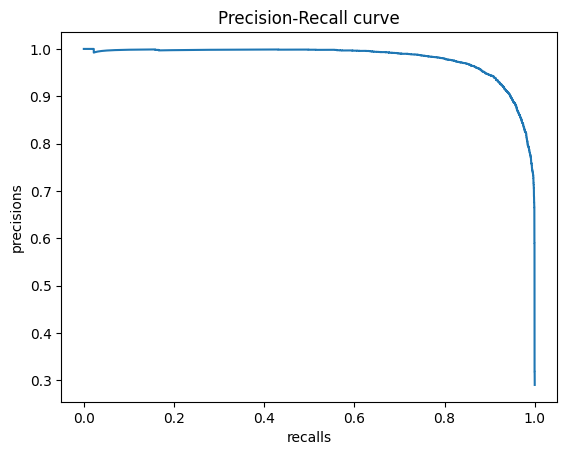

In [37]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [38]:
average_precision_score(y_test, y_pred_proba)

0.9805470580289812

In [39]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(32, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(16, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.002)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [40]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.7042164218535348, 1: 1.7241914618369987}

In [41]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=32,
          epochs=100,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/100
2250/2250 [==============================] - 5s 2ms/step - loss: 0.2061 - recall: 0.9146 - val_loss: 0.1869 - val_recall: 0.9511
Epoch 2/100
2250/2250 [==============================] - 4s 2ms/step - loss: 0.1717 - recall: 0.9295 - val_loss: 0.1650 - val_recall: 0.9334
Epoch 3/100
2250/2250 [==============================] - 4s 2ms/step - loss: 0.1636 - recall: 0.9317 - val_loss: 0.1680 - val_recall: 0.9460
Epoch 4/100
2250/2250 [==============================] - 4s 2ms/step - loss: 0.1597 - recall: 0.9325 - val_loss: 0.1550 - val_recall: 0.9088
Epoch 5/100
2250/2250 [==============================] - 4s 2ms/step - loss: 0.1579 - recall: 0.9325 - val_loss: 0.1652 - val_recall: 0.9455
Epoch 6/100
2250/2250 [==============================] - 4s 2ms/step - loss: 0.1553 - recall: 0.9335 - val_loss: 0.1650 - val_recall: 0.9468
Epoch 7/100
2250/2250 [==============================] - 4s 2ms/step - loss: 0.1521 - recall: 0.9343 - val_loss: 0.1535 - val_recall: 0.9256
Epoch 8/100
2

Epoch 59/100
2250/2250 [==============================] - 3s 1ms/step - loss: 0.1107 - recall: 0.9612 - val_loss: 0.1329 - val_recall: 0.9602
Epoch 60/100
2250/2250 [==============================] - 3s 1ms/step - loss: 0.1111 - recall: 0.9606 - val_loss: 0.1231 - val_recall: 0.9464
Epoch 61/100
2250/2250 [==============================] - 3s 1ms/step - loss: 0.1095 - recall: 0.9608 - val_loss: 0.1302 - val_recall: 0.9473
Epoch 62/100
2250/2250 [==============================] - 3s 1ms/step - loss: 0.1113 - recall: 0.9604 - val_loss: 0.1379 - val_recall: 0.9645
Epoch 63/100
2250/2250 [==============================] - 3s 1ms/step - loss: 0.1098 - recall: 0.9612 - val_loss: 0.1250 - val_recall: 0.9399
Epoch 64/100
2250/2250 [==============================] - 3s 1ms/step - loss: 0.1096 - recall: 0.9614 - val_loss: 0.1258 - val_recall: 0.9537
Epoch 65/100
2250/2250 [==============================] - 3s 1ms/step - loss: 0.1106 - recall: 0.9606 - val_loss: 0.1276 - val_recall: 0.9568
Epoch 

<AxesSubplot: >

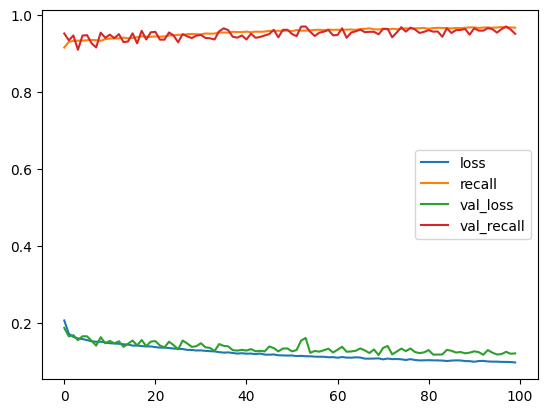

In [42]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [43]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

625/625 [==============================] - 1s 701us/step
[[13504   690]
 [  258  5540]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.97     14194
           1       0.89      0.96      0.92      5798

    accuracy                           0.95     19992
   macro avg       0.94      0.95      0.94     19992
weighted avg       0.95      0.95      0.95     19992



625/625 [==============================] - 0s 695us/step


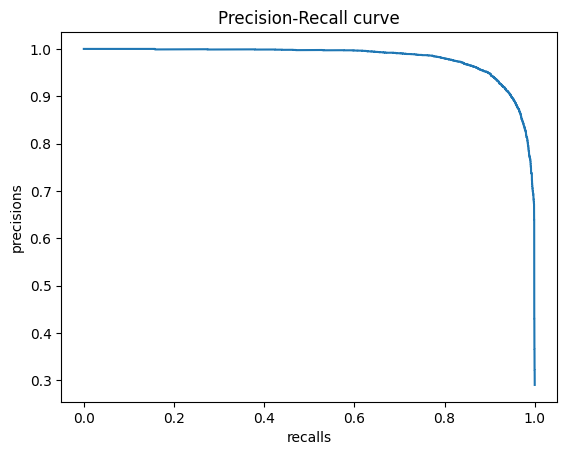

In [44]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [45]:
average_precision_score(y_test, y_pred_proba)

0.9809254861705309

In [46]:
import pickle

pickle.dump(scaler, open("scaler_churn", 'wb'))

In [47]:
scaler = MinMaxScaler().fit(X)

In [48]:
X_scaled = scaler.transform(X)

In [49]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(32, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(16, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.001)

model.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["Recall"])

In [50]:
model.fit(x=X_scaled,
          y=y,
          callbacks=[early_stop],
          batch_size=32,
          validation_split = 0.1,
          epochs=100,
          verbose=1,
          class_weight=class_weights)   

Epoch 1/100
2812/2812 [==============================] - 7s 2ms/step - loss: 0.2169 - recall: 0.9131 - val_loss: 0.1760 - val_recall: 0.9610
Epoch 2/100
2812/2812 [==============================] - 5s 2ms/step - loss: 0.1741 - recall: 0.9305 - val_loss: 0.1562 - val_recall: 0.9391
Epoch 3/100
2812/2812 [==============================] - 5s 2ms/step - loss: 0.1634 - recall: 0.9283 - val_loss: 0.1711 - val_recall: 0.9469
Epoch 4/100
2812/2812 [==============================] - 5s 2ms/step - loss: 0.1605 - recall: 0.9297 - val_loss: 0.1619 - val_recall: 0.9079
Epoch 5/100
2812/2812 [==============================] - 5s 2ms/step - loss: 0.1557 - recall: 0.9315 - val_loss: 0.1555 - val_recall: 0.9281
Epoch 6/100
2812/2812 [==============================] - 5s 2ms/step - loss: 0.1546 - recall: 0.9309 - val_loss: 0.1507 - val_recall: 0.9129
Epoch 7/100
2812/2812 [==============================] - 5s 2ms/step - loss: 0.1522 - recall: 0.9312 - val_loss: 0.1462 - val_recall: 0.9348
Epoch 8/100
2

Epoch 59/100
2812/2812 [==============================] - 5s 2ms/step - loss: 0.1088 - recall: 0.9621 - val_loss: 0.1612 - val_recall: 0.9256
Epoch 60/100
2812/2812 [==============================] - 5s 2ms/step - loss: 0.1071 - recall: 0.9633 - val_loss: 0.1682 - val_recall: 0.9384
Epoch 61/100
2812/2812 [==============================] - 5s 2ms/step - loss: 0.1080 - recall: 0.9632 - val_loss: 0.1624 - val_recall: 0.9111
Epoch 62/100
2812/2812 [==============================] - 5s 2ms/step - loss: 0.1086 - recall: 0.9635 - val_loss: 0.1842 - val_recall: 0.9292
Epoch 63/100
2812/2812 [==============================] - 5s 2ms/step - loss: 0.1078 - recall: 0.9627 - val_loss: 0.1722 - val_recall: 0.9249
Epoch 64/100
2812/2812 [==============================] - 5s 2ms/step - loss: 0.1064 - recall: 0.9638 - val_loss: 0.1690 - val_recall: 0.9193
Epoch 65/100
2812/2812 [==============================] - 5s 2ms/step - loss: 0.1058 - recall: 0.9621 - val_loss: 0.1711 - val_recall: 0.9086
Epoch 

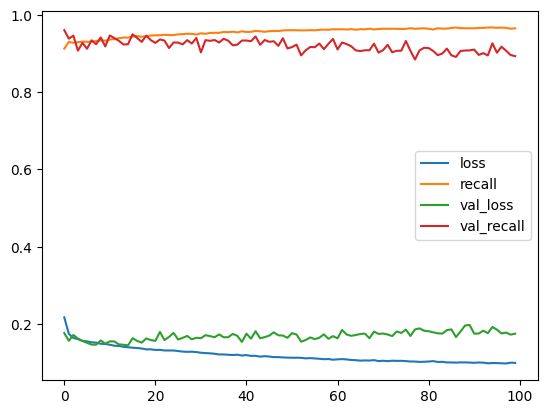

In [52]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [53]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.09113634377717972
recall :  0.9655053615570068


In [54]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

625/625 [==============================] - 1s 699us/step
[[13697   497]
 [  200  5598]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.98     14194
           1       0.92      0.97      0.94      5798

    accuracy                           0.97     19992
   macro avg       0.95      0.97      0.96     19992
weighted avg       0.97      0.97      0.97     19992



## Comparison with ML

In [55]:
model.save('model_churn.h5')

C:\Users\onral\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [60]:
from sklearn.linear_model import LogisticRegression

log_model=LogisticRegression(class_weight='balanced')
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12942  1252]
 [  402  5396]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     14194
           1       0.81      0.93      0.87      5798

    accuracy                           0.92     19992
   macro avg       0.89      0.92      0.90     19992
weighted avg       0.92      0.92      0.92     19992



In [58]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[14119    75]
 [  133  5665]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14194
           1       0.99      0.98      0.98      5798

    accuracy                           0.99     19992
   macro avg       0.99      0.99      0.99     19992
weighted avg       0.99      0.99      0.99     19992

